# GammaLearn for LST-1 data analysis
LST data analysis school, 21-01-2022, Thomas Vuillaume

<img class="fit-picture"
     src="https://gammalearn.pages.in2p3.fr/pages/images/glearn.png"
     alt="GammaLearn logo" width="150" url="https://purl.org/gammalearn">

**All info on https://purl.org/gammalearn**

To run the following, you need to create a new environment and install gammalearn:

```
VERSION=0.7.5
wget https://gitlab.in2p3.fr/gammalearn/gammalearn/-/raw/v${VERSION}/environment.yml -O glearn_${VERSION}_env.yml
conda install mamba -n base -c conda-forge
mamba env create -f glearn_${VERSION}_env.yml
pip install gammalearn==$VERSION
```

If you run on the cluster, you may just source the glearn environment:

```
conda activate /fefs/aswg/workspace/gammalearn/software/miniconda3/envs/gammalearn_v0.7.5
```

----

# Train GammaPhysNet on DL1 images

Training deep networks require GPUs.    
For most of you, this tutorial we be done on CPU, involving poor performances.


If you have access to a GPU, you may use it (`gpus=1` in the config files)


```
tree /fefs/aswg/workspace/gammalearn/Data/experiments/

/fefs/aswg/workspace/gammalearn/Data/experiments/
├── 20211120_dynclean_lapalma
│   ├── 20211120_dynclean_lapalma.log
│   ├── 20211120_dynclean_lapalma_settings.json
│   ├── 20211120_dynclean_lapalma_settings.py
│   └── nets.py
├── 20220110_test_real
│   ├── 20220110_test_real.log
│   ├── 20220110_test_real_settings.json
│   ├── 20220110_test_real_settings.py
│   └── nets.py
├── 20220111_lapalma_training
│   ├── 20220111_lapalma_training.log
│   ├── 20220111_lapalma_training_settings.json
│   ├── 20220111_lapalma_training_settings.py
│   └── nets.py
├── R_01_indexed_real_data
│   ├── R_01_indexed_real_data.log
│   ├── R_01_indexed_real_data_settings.json
│   └── R_01_indexed_real_data_settings.py
├── R_0956_training_complet_1_indexed
│   └── checkpoint_epoch=24.ckpt
├── R_0963_20200629_prod5_trans_80
│   └── checkpoint_epoch=24.ckpt
└── runs
    ├── 20211120_dynclean_lapalma
    ├── 20220110_test_real
    ├── 20220111_lapalma_training
    │   ├── version_0
    │   │   ├── Accuracy_training

```

In [1]:
!ls /fefs/aswg/workspace/gammalearn/Data/experiments/20220121_analysis_lst_school/

20220121_analysis_lst_school.log	    checkpoint_epoch=2.ckpt
20220121_analysis_lst_school_settings.json  checkpoint_epoch=3.ckpt
20220121_analysis_lst_school_settings.py    dl2
checkpoint_epoch=0.ckpt			    nets.py
checkpoint_epoch=1.ckpt


# Results on MC DL2 test dataset

In [7]:
import os
import pandas as pd
from glob import glob
from lstchain.io.io import dl2_params_lstcam_key

In [3]:
dl2_path = '/fefs/aswg/workspace/gammalearn/Data/experiments/20220121_lstschool_training_mc/dl2/'
os.listdir(dl2_path)

['dl2_electron_20deg_180deg_run100___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_electron_20deg_180deg_run1007___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_electron_20deg_180deg_run1006___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_electron_20deg_180deg_run1000___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_proton_20deg_180deg_run1003___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_proton_20deg_180deg_run1008___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_gamma_20deg_180deg_run104___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_gamma_20deg_180deg_run1000___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_gamma_20deg_180deg_run100___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_proton_20deg_180deg_run1015___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_gamma_20deg_180deg_run106___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5',
 'dl2_electron_20deg_

In [6]:
def read_dl2(filelist):
    return pd.concat([pd.read_hdf(filename, key=dl2_params_lstcam_key) for filename in filelist])

In [12]:
gammas = read_dl2(glob(dl2_path + '*gamma*'))
protons = read_dl2(glob(dl2_path + '*proton*'))
electrons = read_dl2(glob(dl2_path + '*electron*'))

In [13]:
gammas

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,src_y,reco_energy,reco_core_x,reco_core_y,reco_alt,reco_az,reco_particle,gammaness,reco_proba_0,reco_proba_101
0,104,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
1,104,1208,52.120873,1.717012,0.273476,0.004030,0.273505,0.014737,0.057491,0.005294,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
2,104,2601,44.924502,1.652483,0.172036,0.206268,0.268594,0.875639,0.075402,0.005311,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
3,104,2702,53.729533,1.730213,0.382038,0.578388,0.693170,0.987059,0.075169,0.003650,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
4,104,2709,60.910478,1.784692,-0.525582,0.282343,0.596619,2.648630,0.076029,0.003313,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,111,998502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
2064,111,998506,51.843619,1.714695,-0.296474,0.014598,0.296833,3.092392,0.066032,0.003163,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
2065,111,998709,95.636566,1.980624,-0.158678,0.072560,0.174482,2.712702,0.065089,0.004964,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835
2066,111,999900,57.589187,1.760341,0.290546,0.468674,0.551428,1.015851,0.057910,0.004066,...,0.0,0.10286,-77.803322,-74.582275,1.220924,3.14311,0,0.798165,0.798165,0.201835


# Inference on real data

Copy the experiment settings file from the training in a new directory. This way, we make sure to use the same network parameters.  

Parameters to change:
- experiment_name
- info
- checkpoint_path
- train
- test_folders


In [2]:
!ls /fefs/aswg/workspace/gammalearn/Data/experiments/lstchool_real/

dl2		   lstchool_real_settings.json	nets.py
lstchool_real.log  lstchool_real_settings.py


In [3]:
filepath = '/fefs/aswg/workspace/gammalearn/Data/experiments/lstchool_real/dl2/dl2_LST-1.Run02977.0122.h5'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from lstchain.io.io import dl2_params_lstcam_key
from lstchain.visualization import plot_dl2
import ctaplot

In [5]:
dl2_df = pd.read_hdf(filepath, key=dl2_params_lstcam_key)

In [6]:
dl2_df

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,time_gradient,intercept,leakage_intensity_width_1,leakage_intensity_width_2,leakage_pixels_width_1,leakage_pixels_width_2,n_pixels,concentration_cog,concentration_core,concentration_pixel,n_islands,alt_tel,az_tel,calibration_id,dragon_time,ucts_time,tib_time,ucts_jump,mc_type,wl,tel_id,tel_pos_x,tel_pos_y,tel_pos_z,trigger_type,ucts_trigger_type,trigger_time,event_type,reco_energy,reco_core_x,reco_core_y,reco_alt,reco_az,reco_particle,gammaness,reco_proba_0,reco_proba_101,delta_t
0,2977,6466001,60.316762,1.780438,0.109015,0.047757,0.119017,0.412898,0.082072,0.004590,0.033889,0.003373,0.631017,0.597497,1.754784,-23.402530,13.104529,0.000000,0.000000,0.000000,0.000000,4,0.744514,0.169679,0.389263,1,1.193516,4.498466,0,1.605932e+09,0,0,False,-9999,0.412916,1,50.0,50.0,16.0,-1,1,1.605932e+09,32,0.113265,6.015427,40.852432,1.193074,4.502761,0,0.770888,0.770888,0.229112,0.000000
1,2977,6466002,205.975807,2.313816,-0.482012,0.074050,0.487666,2.989157,0.124228,0.004199,0.049929,0.001831,0.675201,0.141399,1.941390,0.793047,15.479862,0.000000,0.000000,0.000000,0.000000,11,0.466454,0.120050,0.173430,1,1.193516,4.498466,0,1.605932e+09,0,0,False,-9999,0.401912,1,50.0,50.0,16.0,-1,1,1.605932e+09,32,0.113265,6.015427,40.852432,1.193074,4.502761,0,0.770888,0.770888,0.229112,0.000250
2,2977,6466003,117.325539,2.069393,0.554631,-0.017906,0.554920,-0.032273,0.066669,0.004053,0.041927,0.002712,0.238605,0.080833,2.734651,-9.508022,15.161512,0.000000,0.000000,0.000000,0.000000,6,0.800008,0.367029,0.367029,1,1.193516,4.498466,0,1.605932e+09,0,0,False,-9999,0.628878,1,50.0,50.0,16.0,-1,1,1.605932e+09,32,0.113265,6.015427,40.852432,1.193074,4.502761,0,0.770888,0.770888,0.229112,0.000164
3,2977,6466004,240.278830,2.380716,0.235093,0.375245,0.442806,1.011116,0.091402,0.003811,0.065250,0.002695,-1.372363,-0.583793,2.670857,3.577987,14.575949,0.000000,0.000000,0.000000,0.000000,11,0.526786,0.170824,0.170824,1,1.193516,4.498466,0,1.605932e+09,0,0,False,-9999,0.713882,1,50.0,50.0,16.0,-1,1,1.605932e+09,32,0.113265,6.015427,40.852432,1.193074,4.502761,0,0.770888,0.770888,0.229112,0.000032
4,2977,6466005,61.435034,1.788416,0.593398,-0.196613,0.625122,-0.319951,0.064148,0.003816,0.043401,0.001187,0.766980,0.174940,1.869447,-11.815398,12.203193,0.000000,0.000000,0.000000,0.000000,5,0.745987,0.000000,0.346458,1,1.193516,4.498466,0,1.605932e+09,0,0,False,-9999,0.676573,1,50.0,50.0,16.0,-1,1,1.605932e+09,32,0.113265,6.015427,40.852432,1.193074,4.502761,0,0.770888,0.770888,0.229112,0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,2977,6481215,59.577244,1.775080,0.249317,-0.476986,0.538214,-1.089159,0.071471,0.005932,0.044943,0.003264,0.390147,-0.007427,2.641736,-6.552377,14.296660,0.000000,0.000000,0.000000,0.000000,5,0.835454,0.603554,0.339331,1,1.193329,4.498665,0,1.605932e+09,0,0,False,-9999,0.628821,1,50.0,50.0,16.0,-1,1,1.605932e+09,255,0.113265,6.015427,40.852432,1.192887,4.502961,0,0.770888,0.770888,0.229112,0.000066
15215,2977,6481216,109.728345,2.040319,-0.556924,0.763384,0.944944,2.201079,0.100771,0.005825,0.036038,0.002516,-0.731146,-0.721956,2.466325,-1.654173,16.265485,0.000000,0.000000,0.000000,0.000000,8,0.628528,0.452331,0.452331,1,1.193329,4.498665,0,1.605932e+09,0,0,False,-9999,0.357620,1,50.0,50.0,16.0,-1,1,1.605932e+09,255,0.113265,6.015427,40.852432,1.192887,4.502961,0,0.770888,0.770888,0.229112,0.000008
15216,2977,6481217,91.212227,1.960053,-0.511740,0.978020,1.103812,2.052863,0.072865,0.004988,0.039412,0.001473,1.527929,0.748054,2.710038,-17.463129,13.743450,0.661886,1.000000,0.001617,0.002695,5,0.806171,0.221745,0.292900,1,1.193329,4.498665,0,1.605932e+09,0,0,False,-9999,0.540888,1,50.0,50.0,16.0,-1,1,1.605932e+09,255,0.113265,6.015427,40.852

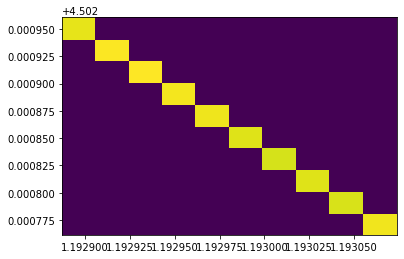

In [11]:
plt.hist2d(dl2_df['reco_alt'], dl2_df['reco_az']);